<a href="https://colab.research.google.com/github/IreneJeong/Project-Storage/blob/main/MLS_CW_Manual_Additional(Cifar10).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trial 1

In [2]:
#@title Modul import
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from keras.layers import BatchNormalization

# importing of service libraries
import numpy as np
import matplotlib.pyplot as plt

# for saving the each result 
import os
from datetime import datetime
notebook_name = os.path.basename(os.getcwd())

print('Libraries imported.')

#@title Random Seed Setting
import random
import tensorflow as tf
import os


def set_seed(seed=42):
    '''
    Sets the seed of the entire notebook so results are the same every time we run.
    This is for REPRODUCIBILITY.
    '''
    np.random.seed(seed)
    random.seed(seed)
    tf.random.set_seed(seed)
    session_conf = tf.compat.v1.ConfigProto(
        intra_op_parallelism_threads=1,
        inter_op_parallelism_threads=1)
    sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
    tf.compat.v1.keras.backend.set_session(sess)
    # Set a fixed value for the hash seed
    os.environ['PYTHONHASHSEED'] = str(seed)
    
set_seed()

#@title Pre-defined function for plotting history
#Define the function for plotting the history of the training of the model
def plot_history(history):
    val_loss = history.history['val_loss' ]
    loss =     history.history['loss' ]
    acc =      history.history['accuracy' ]
    val_acc =  history.history['val_accuracy' ]

    epochs    = range(1,len(acc)+1,1)

    plt.plot  ( epochs,     acc, 'r--', label='Training acc'  )
    plt.plot  ( epochs, val_acc,  'b', label='Validation acc')
    plt.title ('Training and validation accuracy')
    plt.ylabel('acc')
    plt.xlabel('epochs')
    plt.legend()

    plt.figure()

    plt.plot  ( epochs,     loss, 'r--', label='Training loss' )
    plt.plot  ( epochs, val_loss ,  'b', label='Validation loss' )
    plt.title ('Training and validation loss')
    plt.ylabel('loss')
    plt.xlabel('epochs')
    plt.legend()

    plt.figure()

#@title Earlystopping
from tensorflow.keras.callbacks import EarlyStopping

# define early stopping callback
earlystop_callback = EarlyStopping(
    monitor='val_loss', # monitor validation loss
    min_delta=0.001, # minimum change in the monitored quantity to qualify as an improvement
    patience=5, # number of epochs with no improvement after which training will be stopped
    verbose=1 # prints a message when early stopping is triggered
)

Libraries imported.


In [3]:
#@title training constants preset
BATCH_SIZE = 128
N_EPOCH = 50
VERBOSE = 1
VALIDATION_SPLIT = 0.2
learning_rate = 0.0001
OPTIM = tf.keras.optimizers.legacy.Adam(learning_rate = learning_rate)
KERNEL = (3,3)

print('Main variables initialised.')

Main variables initialised.


In [4]:
#@title Data Reloading and Preprocessing
from tensorflow.keras.datasets import cifar10
(input_X_train, output_y_train),(input_X_test, output_y_test)=cifar10.load_data()

print('input_X_train shape: ', input_X_train.shape)
print(input_X_train.shape[0], 'train samples')
print(input_X_test.shape[0], 'test samples')

# CIFAR_10 is a set of 60K images 32x32 pixels on 3 channels
IMG_CHANNELS = 3
IMAGE_SIZE = input_X_train.shape[1]

print('Image variables initialisation')

N_CLASSES =len(np.unique(output_y_train))

# output data one-hot encoding 
output_y_train=utils.to_categorical(output_y_train, N_CLASSES)
output_y_test=utils.to_categorical(output_y_test, N_CLASSES)

# To normalize the value in between 0 and 1 (there are 255 kinds)
input_X_train=input_X_train.astype('float32')
input_X_test=input_X_test.astype('float32')

input_X_train /=255
input_X_test /=255

#@title Model building & Compiling
from keras.layers import BatchNormalization
# Complex DNN model definition
model = Sequential()

# hidden 1 : conv + conv + pool + dropout 
model.add(Conv2D(32, (3,3), padding='same', input_shape=(IMAGE_SIZE, IMAGE_SIZE, IMG_CHANNELS)))
model.add(Activation('relu'))
model.add(Conv2D(32, (3,3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(BatchNormalization())

# hidden 2 : conv + conv + pool + dropout 
model.add(Conv2D(64, (3,3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(BatchNormalization())
 
# hidden 3 : flatten + droupout 
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))

# output 
model.add(Dense(N_CLASSES))
model.add(Activation('softmax'))

# Result with data augmentation
model.compile(loss='categorical_crossentropy', optimizer=OPTIM, metrics=['accuracy'])
model.summary()

170498071/170498071 [==============================] - 13s 0us/step
input_X_train shape:  (50000, 32, 32, 3)
50000 train samples
10000 test samples
Image variables initialisation
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
         

Epoch 1/50
390/390 [==============================] - 40s 79ms/step - loss: 2.2523 - accuracy: 0.2109 - val_loss: 2.5127 - val_accuracy: 0.1013
Epoch 2/50
390/390 [==============================] - 27s 69ms/step - loss: 1.8768 - accuracy: 0.3108 - val_loss: 1.5760 - val_accuracy: 0.4252
Epoch 3/50
390/390 [==============================] - 28s 71ms/step - loss: 1.7449 - accuracy: 0.3496 - val_loss: 1.4597 - val_accuracy: 0.4801
Epoch 4/50
390/390 [==============================] - 32s 82ms/step - loss: 1.6628 - accuracy: 0.3822 - val_loss: 1.4992 - val_accuracy: 0.4571
Epoch 5/50
390/390 [==============================] - 32s 81ms/step - loss: 1.6067 - accuracy: 0.4049 - val_loss: 1.3873 - val_accuracy: 0.5034
Epoch 6/50
390/390 [==============================] - 28s 71ms/step - loss: 1.5446 - accuracy: 0.4317 - val_loss: 1.3908 - val_accuracy: 0.4941
Epoch 7/50
390/390 [==============================] - 26s 67ms/step - loss: 1.5042 - accuracy: 0.4447 - val_loss: 1.3208 - val_accuracy:

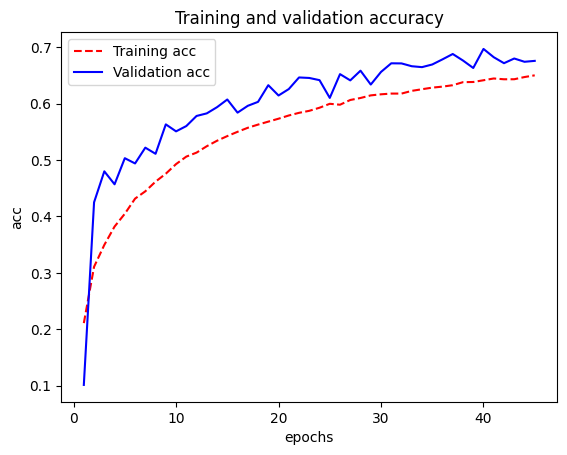

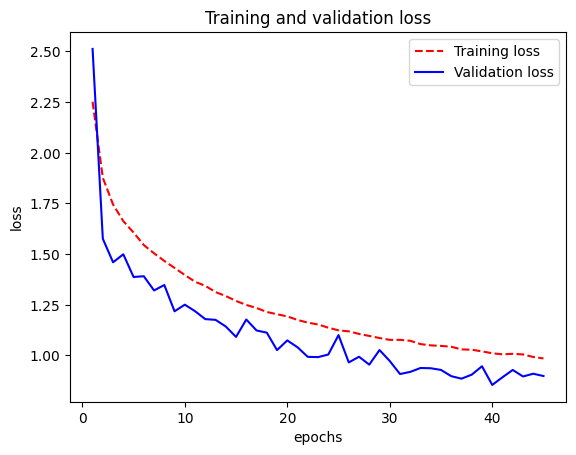

<Figure size 640x480 with 0 Axes>

In [5]:
#@title Data Augementation & Fitting & Saving 
from tensorflow.keras.preprocessing.image import ImageDataGenerator


data_generator = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(input_X_train, output_y_train, BATCH_SIZE)
steps_per_epoch = input_X_train.shape[0] // BATCH_SIZE

history=model.fit(train_generator, batch_size=BATCH_SIZE, 
                  epochs=N_EPOCH, validation_data=(input_X_test, output_y_test), steps_per_epoch=steps_per_epoch, verbose=VERBOSE, callbacks=[earlystop_callback])

# Data Save
file_name = 'model_complex(aug)'
now = datetime.now().strftime("%d-%m-%Y")
model.save(f'{notebook_name} - {file_name} - {now}.h5')
# and reload it with:
#reloaded_model = tf.keras.models.load_model('model_complex(aug).h5')

#@title Final Evaluation
plot_history(history)

final_accuracy = history.history["val_accuracy"][-5:]
print("FINAL ACCURACY MEAN-5: ", np.mean(final_accuracy))

test_acc_complex_aug = model.evaluate(input_X_test, output_y_test, verbose=2)
print("test accuracy: ", test_acc_complex_aug)

## Trial 2

In [6]:
#@title training constants preset
BATCH_SIZE = 128
N_EPOCH = 50
VERBOSE = 1
VALIDATION_SPLIT = 0.2
learning_rate = 0.01
OPTIM = tf.keras.optimizers.legacy.Adam(learning_rate = learning_rate)
KERNEL = (3,3)

print('Main variables initialised.')

Main variables initialised.


input_X_train shape:  (50000, 32, 32, 3)
50000 train samples
10000 test samples
Image variables initialisation
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 activation_6 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 activation_7 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_

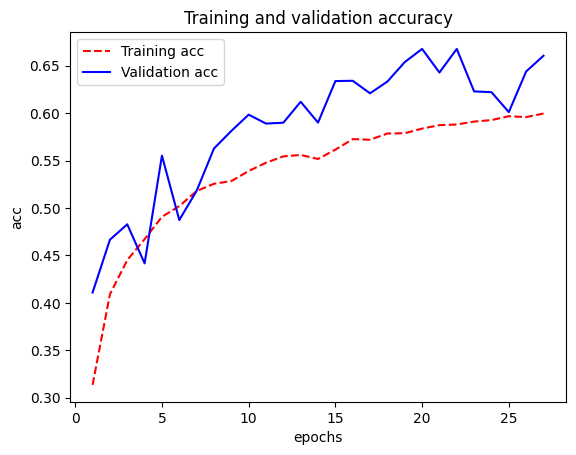

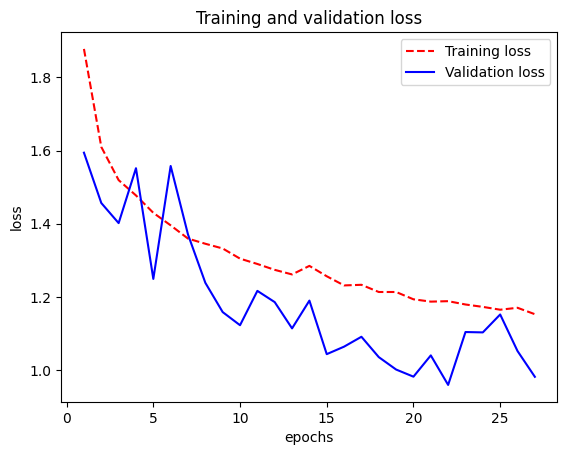

<Figure size 640x480 with 0 Axes>

In [7]:
#@title Data Reloading and Preprocessing
from tensorflow.keras.datasets import cifar10
(input_X_train, output_y_train),(input_X_test, output_y_test)=cifar10.load_data()

print('input_X_train shape: ', input_X_train.shape)
print(input_X_train.shape[0], 'train samples')
print(input_X_test.shape[0], 'test samples')

# CIFAR_10 is a set of 60K images 32x32 pixels on 3 channels
IMG_CHANNELS = 3
IMAGE_SIZE = input_X_train.shape[1]

print('Image variables initialisation')

N_CLASSES =len(np.unique(output_y_train))

# output data one-hot encoding 
output_y_train=utils.to_categorical(output_y_train, N_CLASSES)
output_y_test=utils.to_categorical(output_y_test, N_CLASSES)

# To normalize the value in between 0 and 1 (there are 255 kinds)
input_X_train=input_X_train.astype('float32')
input_X_test=input_X_test.astype('float32')

input_X_train /=255
input_X_test /=255

#@title Model building & Compiling
from keras.layers import BatchNormalization
# Complex DNN model definition
model = Sequential()

# hidden 1 : conv + conv + pool + dropout 
model.add(Conv2D(32, (3,3), padding='same', input_shape=(IMAGE_SIZE, IMAGE_SIZE, IMG_CHANNELS)))
model.add(Activation('relu'))
model.add(Conv2D(32, (3,3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(BatchNormalization())

# hidden 2 : conv + conv + pool + dropout 
model.add(Conv2D(64, (3,3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(BatchNormalization())
 
# hidden 3 : flatten + droupout 
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))

# output 
model.add(Dense(N_CLASSES))
model.add(Activation('softmax'))

# Result with data augmentation
model.compile(loss='categorical_crossentropy', optimizer=OPTIM, metrics=['accuracy'])
model.summary()

#@title Data Augementation & Fitting & Saving 
from tensorflow.keras.preprocessing.image import ImageDataGenerator


data_generator = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(input_X_train, output_y_train, BATCH_SIZE)
steps_per_epoch = input_X_train.shape[0] // BATCH_SIZE

history=model.fit(train_generator, batch_size=BATCH_SIZE, 
                  epochs=N_EPOCH, validation_data=(input_X_test, output_y_test), steps_per_epoch=steps_per_epoch, verbose=VERBOSE, callbacks=[earlystop_callback])

# Data Save
file_name = 'model_complex(aug)'
now = datetime.now().strftime("%d-%m-%Y")
model.save(f'{notebook_name} - {file_name} - {now}.h5')
# and reload it with:
#reloaded_model = tf.keras.models.load_model('model_complex(aug).h5')

#@title Final Evaluation
plot_history(history)

final_accuracy = history.history["val_accuracy"][-5:]
print("FINAL ACCURACY MEAN-5: ", np.mean(final_accuracy))

test_acc_complex_aug = model.evaluate(input_X_test, output_y_test, verbose=2)
print("test accuracy: ", test_acc_complex_aug)

## Trial 3

Main variables initialised.
input_X_train shape:  (50000, 32, 32, 3)
50000 train samples
10000 test samples
Image variables initialisation
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 activation_30 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 conv2d_17 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 activation_31 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                               

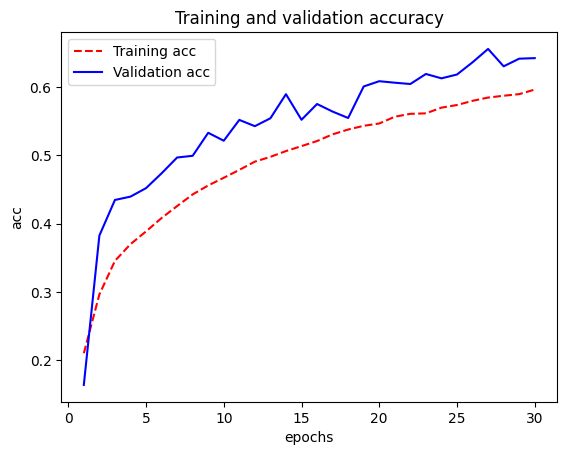

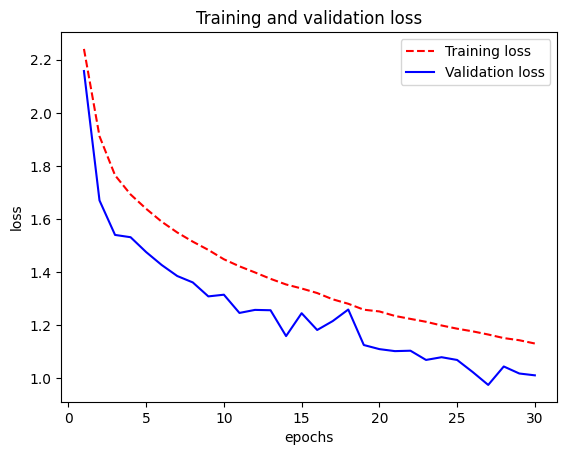

<Figure size 640x480 with 0 Axes>

In [14]:
#@title training constants preset
BATCH_SIZE = 128
N_EPOCH = 30
VERBOSE = 1
VALIDATION_SPLIT = 0.2
learning_rate = 0.0001
OPTIM = tf.keras.optimizers.legacy.Adam(learning_rate = learning_rate)
KERNEL = (3,3)

print('Main variables initialised.')

#@title Data Reloading and Preprocessing
from tensorflow.keras.datasets import cifar10
(input_X_train, output_y_train),(input_X_test, output_y_test)=cifar10.load_data()

print('input_X_train shape: ', input_X_train.shape)
print(input_X_train.shape[0], 'train samples')
print(input_X_test.shape[0], 'test samples')

# CIFAR_10 is a set of 60K images 32x32 pixels on 3 channels
IMG_CHANNELS = 3
IMAGE_SIZE = input_X_train.shape[1]

print('Image variables initialisation')

N_CLASSES =len(np.unique(output_y_train))

# output data one-hot encoding 
output_y_train=utils.to_categorical(output_y_train, N_CLASSES)
output_y_test=utils.to_categorical(output_y_test, N_CLASSES)

# To normalize the value in between 0 and 1 (there are 255 kinds)
input_X_train=input_X_train.astype('float32')
input_X_test=input_X_test.astype('float32')

input_X_train /=255
input_X_test /=255

#@title Model building & Compiling
from keras.layers import BatchNormalization
# Complex DNN model definition
model = Sequential()

# hidden 1 : conv + conv + pool + dropout 
model.add(Conv2D(32, (3,3), padding='same', input_shape=(IMAGE_SIZE, IMAGE_SIZE, IMG_CHANNELS)))
model.add(Activation('relu'))
model.add(Conv2D(32, (3,3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(BatchNormalization())

# hidden 2 : conv + conv + pool + dropout 
model.add(Conv2D(64, (3,3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(BatchNormalization())
 
# hidden 3 : flatten + droupout 
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))

# output 
model.add(Dense(N_CLASSES))
model.add(Activation('softmax'))

# Result with data augmentation
model.compile(loss='categorical_crossentropy', optimizer=OPTIM, metrics=['accuracy'])
model.summary()

#@title Data Augementation & Fitting & Saving 
from tensorflow.keras.preprocessing.image import ImageDataGenerator


data_generator = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(input_X_train, output_y_train, BATCH_SIZE)
steps_per_epoch = input_X_train.shape[0] // BATCH_SIZE

history=model.fit(train_generator, batch_size=BATCH_SIZE, 
                  epochs=N_EPOCH, validation_data=(input_X_test, output_y_test), steps_per_epoch=steps_per_epoch, verbose=VERBOSE, callbacks=[earlystop_callback])

#@title Final Evaluation
plot_history(history)

final_accuracy = history.history["val_accuracy"][-5:]
print("FINAL ACCURACY MEAN-5: ", np.mean(final_accuracy))

test_acc_complex_aug = model.evaluate(input_X_test, output_y_test, verbose=2)
print("test accuracy: ", test_acc_complex_aug)

## Trial 4

Main variables initialised.
CNN Network Definition setup
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 activation_27 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_15 (Dropout)        (None, 16, 16, 32)        0         
                                                                 
 flatten_6 (Flatten)         (None, 8192)              0         
                                                                 
 dense_12 (Dense)            (None, 512)               4194816 

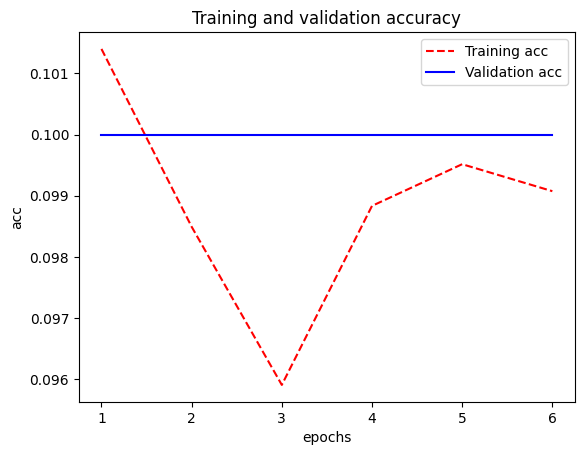

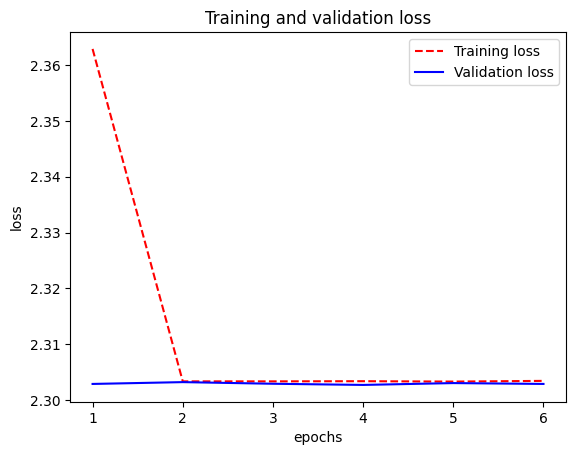

<Figure size 640x480 with 0 Axes>

In [13]:
#@title training constants preset
BATCH_SIZE = 128
N_EPOCH = 50
VERBOSE = 1
VALIDATION_SPLIT = 0.2
learning_rate = 0.01
OPTIM = tf.keras.optimizers.legacy.Adam(learning_rate = learning_rate)
KERNEL = (3,3)

print('Main variables initialised.')

#Simpler Model

model=Sequential()

# layer 1 
model.add(Conv2D(32, (3,3), padding='same', input_shape=(IMAGE_SIZE, IMAGE_SIZE, IMG_CHANNELS)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(N_CLASSES))
model.add(Activation('softmax'))

print('CNN Network Definition setup')

# Result with data augmentation
model.compile(loss='categorical_crossentropy', optimizer=OPTIM, metrics=['accuracy'])
model.summary()

#@title Data Augmentation & Fitting & Saving
from tensorflow.keras.preprocessing.image import ImageDataGenerator


data_generator = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(input_X_train, output_y_train, BATCH_SIZE)
steps_per_epoch = input_X_train.shape[0] // BATCH_SIZE

history=model.fit(train_generator, batch_size=BATCH_SIZE, 
                  epochs=N_EPOCH, validation_data=(input_X_test, output_y_test), steps_per_epoch=steps_per_epoch, verbose=1, callbacks=[earlystop_callback])

# Data Saving 
file_name = 'model_simple(aug)'
now = datetime.now().strftime("%d-%m-%Y")
model.save(f'{notebook_name} - {file_name} - {now}.h5')
# and reload it with:
#reloaded_model = tf.keras.models.load_model('model_complex2.h5')

#@title Test_accuracy 
final_accuracy = history.history["val_accuracy"][-5:]
print("FINAL ACCURACY MEAN-5: ", np.mean(final_accuracy))

plot_history(history)

test_acc_simple_aug = model.evaluate(input_X_test, output_y_test, verbose=2)
print("test accuracy: ", test_acc_simple_aug)

## Trial 5

Main variables initialised.
CNN Network Definition setup
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 activation_21 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_11 (Dropout)        (None, 16, 16, 32)        0         
                                                                 
 flatten_4 (Flatten)         (None, 8192)              0         
                                                                 
 dense_8 (Dense)             (None, 512)               4194816 

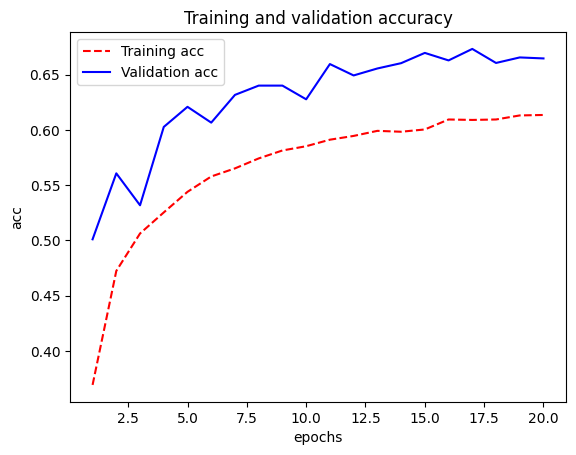

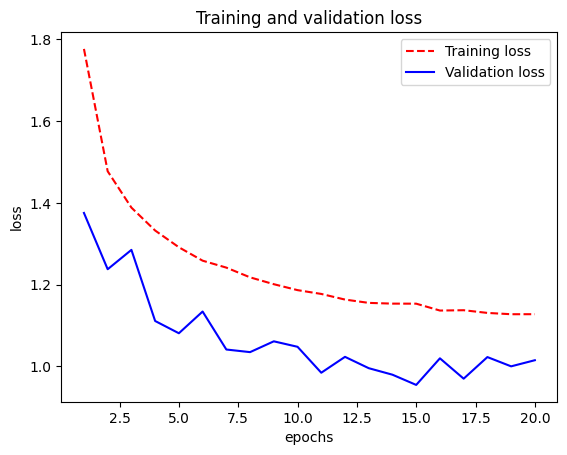

<Figure size 640x480 with 0 Axes>

In [11]:
#@title training constants preset
BATCH_SIZE = 128
N_EPOCH = 50
VERBOSE = 1
VALIDATION_SPLIT = 0.2
learning_rate = 0.001
OPTIM = tf.keras.optimizers.legacy.RMSprop(learning_rate = learning_rate)
KERNEL = (3,3)

print('Main variables initialised.')

#Simpler Model

model=Sequential()

# layer 1 
model.add(Conv2D(32, (3,3), padding='same', input_shape=(IMAGE_SIZE, IMAGE_SIZE, IMG_CHANNELS)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(N_CLASSES))
model.add(Activation('softmax'))

print('CNN Network Definition setup')

# Result with data augmentation
model.compile(loss='categorical_crossentropy', optimizer=OPTIM, metrics=['accuracy'])
model.summary()

#@title Data Augmentation & Fitting & Saving
from tensorflow.keras.preprocessing.image import ImageDataGenerator


data_generator = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(input_X_train, output_y_train, BATCH_SIZE)
steps_per_epoch = input_X_train.shape[0] // BATCH_SIZE

history=model.fit(train_generator, batch_size=BATCH_SIZE, 
                  epochs=N_EPOCH, validation_data=(input_X_test, output_y_test), steps_per_epoch=steps_per_epoch, verbose=1, callbacks=[earlystop_callback])

# Data Saving 
file_name = 'model_simple(aug)'
now = datetime.now().strftime("%d-%m-%Y")
model.save(f'{notebook_name} - {file_name} - {now}.h5')
# and reload it with:
#reloaded_model = tf.keras.models.load_model('model_complex2.h5')

#@title Test_accuracy 
final_accuracy = history.history["val_accuracy"][-5:]
print("FINAL ACCURACY MEAN-5: ", np.mean(final_accuracy))

plot_history(history)

test_acc_simple_aug = model.evaluate(input_X_test, output_y_test, verbose=2)
print("test accuracy: ", test_acc_simple_aug)

## Trial 6

Main variables initialised.
CNN Network Definition setup
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 activation_24 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_13 (Dropout)        (None, 16, 16, 32)        0         
                                                                 
 flatten_5 (Flatten)         (None, 8192)              0         
                                                                 
 dense_10 (Dense)            (None, 512)               4194816 

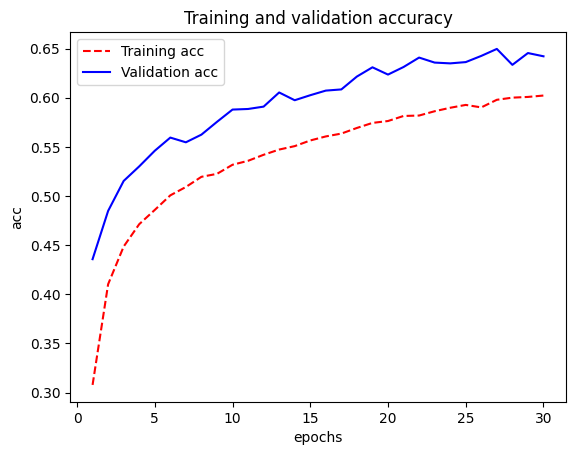

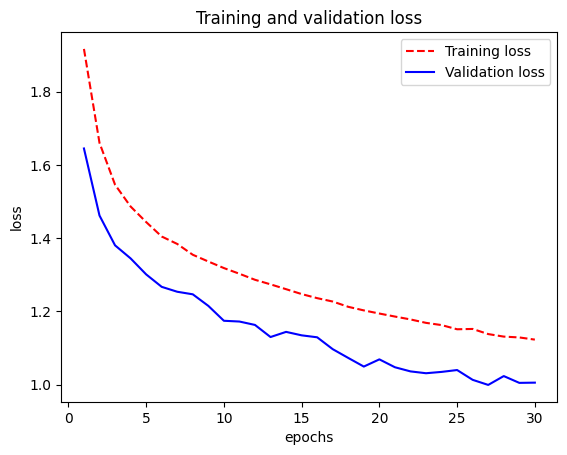

<Figure size 640x480 with 0 Axes>

In [12]:
#@title training constants preset
BATCH_SIZE = 128
N_EPOCH = 30
VERBOSE = 1
VALIDATION_SPLIT = 0.2
learning_rate = 0.0001
OPTIM = tf.keras.optimizers.legacy.Adam(learning_rate = learning_rate)
KERNEL = (3,3)

print('Main variables initialised.')

#Simpler Model

model=Sequential()

# layer 1 
model.add(Conv2D(32, (3,3), padding='same', input_shape=(IMAGE_SIZE, IMAGE_SIZE, IMG_CHANNELS)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(N_CLASSES))
model.add(Activation('softmax'))

print('CNN Network Definition setup')

# Result with data augmentation
model.compile(loss='categorical_crossentropy', optimizer=OPTIM, metrics=['accuracy'])
model.summary()

#@title Data Augmentation & Fitting & Saving
from tensorflow.keras.preprocessing.image import ImageDataGenerator


data_generator = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(input_X_train, output_y_train, BATCH_SIZE)
steps_per_epoch = input_X_train.shape[0] // BATCH_SIZE

history=model.fit(train_generator, batch_size=BATCH_SIZE, 
                  epochs=N_EPOCH, validation_data=(input_X_test, output_y_test), steps_per_epoch=steps_per_epoch, verbose=1, callbacks=[earlystop_callback])

# Data Saving 
file_name = 'model_simple(aug)'
now = datetime.now().strftime("%d-%m-%Y")
model.save(f'{notebook_name} - {file_name} - {now}.h5')
# and reload it with:
#reloaded_model = tf.keras.models.load_model('model_complex2.h5')

#@title Test_accuracy 
final_accuracy = history.history["val_accuracy"][-5:]
print("FINAL ACCURACY MEAN-5: ", np.mean(final_accuracy))

plot_history(history)

test_acc_simple_aug = model.evaluate(input_X_test, output_y_test, verbose=2)
print("test accuracy: ", test_acc_simple_aug)